In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


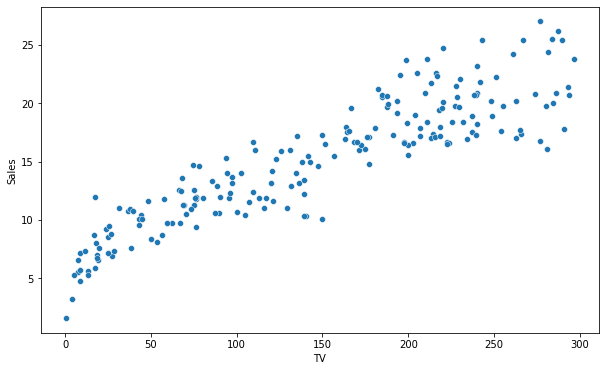

In [4]:
#with TV
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.show()

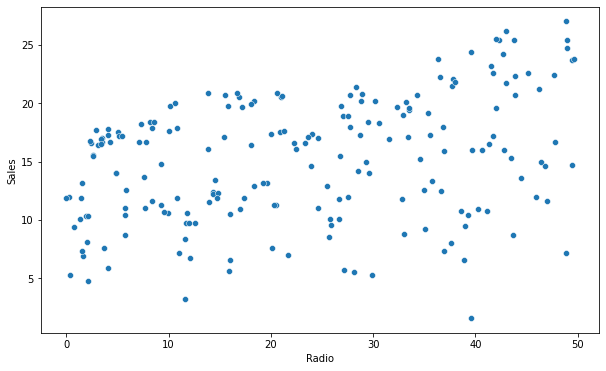

In [5]:
#with Radio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.show()

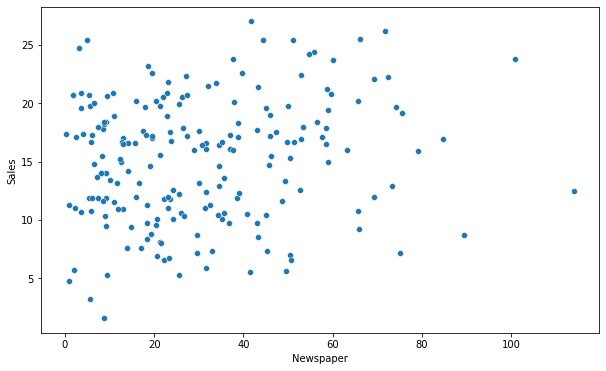

In [6]:
#with Newspaper
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.show()

#Bog'liqlik haqida
Faqat Tv dagi reklamar bilan chiziqli bog'liqlik bor ekan.





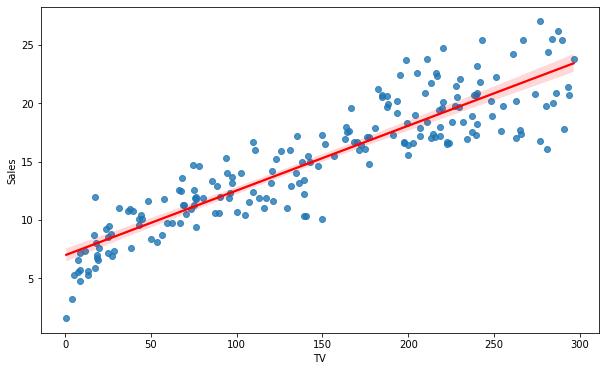

In [9]:
#with TV
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": 'red'})
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
LR_model = LinearRegression()

In [11]:
tv = df.copy()
tv.drop(['Radio', 'Newspaper'], axis=1, inplace=True)
tv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [13]:
tv.info

<bound method DataFrame.info of         TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2   12.0
3    151.5   16.5
4    180.8   17.9
..     ...    ...
195   38.2    7.6
196   94.2   14.0
197  177.0   14.8
198  283.6   25.5
199  232.1   18.4

[200 rows x 2 columns]>

In [14]:
tv.shape

(200, 2)

In [15]:
train_set, test_set = train_test_split(tv, test_size=0.1, random_state=42)
x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

In [16]:
LR_model.fit(x_train, y_train)

LinearRegression()

In [17]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

y_predict = LR_model.predict(x_test)

In [18]:
bashorat = pd.DataFrame()

In [23]:
bashorat['haqiqiy narx'] = pd.DataFrame(y_test)
bashorat['bashorat qilingan narx'] = y_predict
bashorat.head()

,haqiqiy narx,bashorat qilingan narx
0,16.9,16.048075
1,22.4,17.817833
2,21.4,23.193264
3,7.3,7.689968
4,24.7,19.190635


In [24]:
MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

print(f"Absolut xatolik = {MAE}")
print(f"O'rtacha kvadratik xatolik = {RMSE}")

Absolut xatolik = 2.037955356968121
O'rtacha kvadratik xatolik = 2.5103822386472214
